In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
import plotly.express as px

# Hexbin plot

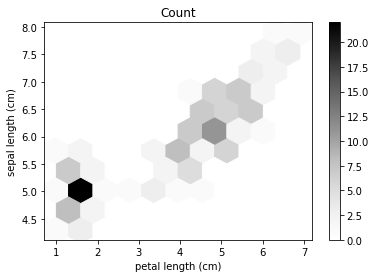

In [2]:
from sklearn.datasets import load_iris
df = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
ax = df.plot.hexbin(x = 'petal length (cm)', y = 'sepal length (cm)', 
                    gridsize= 10,
                    sharex=False,
                    title = 'Count',
                    cmap='Greys')

# Bubble plot

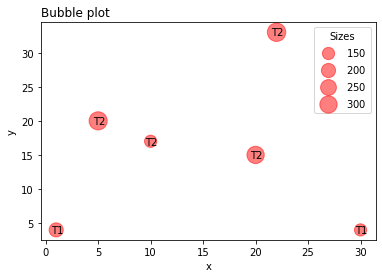

In [3]:
x = np.array([1,10,30,22,5,20])
y = np.array([4,17,4,33,20,15])
z = np.array([20,15,15,34,33,30])*10
t = np.array(["T1", "T2", "T1", "T2", "T2", "T2"])

fig = plt.scatter(x, y,
            s = z,
            c = "red",
            alpha = 0.5)

plt.legend(*fig.legend_elements(prop = "sizes", alpha = 0.5, num = 4, c = "red"),
                                loc="upper right", 
                                title="Sizes")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Bubble plot", loc="left")

#plot text
for i, txt in enumerate(t):
    plt.text(x[i]-.5, y[i]-.5, txt)

plt.show()

# Grouped bar chart

In [4]:
year = np.repeat(np.arange(2016,2018),12, axis = None)
month = np.tile(np.arange(1,13),2)
sales = np.random.poisson(15, size = 24)
m = np.array(["Jan", "Feb", "Mar", "Apr","May", "Jun", "Jul","Aug", "Sep", "Oct","Nov", "Dec"])
df = pd.DataFrame({'year':year,
                  'month':month,
                  'sales':sales})

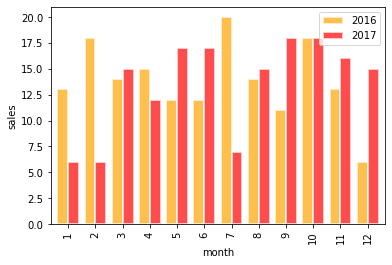

In [5]:
df.pivot(columns='year', index='month', values='sales').plot(kind='bar',
                                                             width=.8, 
                                                             edgecolor='white', 
                                                             color=['orange','red'],
                                                             ylabel= 'sales',
                                                             linewidth=2,
                                                             alpha = 0.7)

plt.legend(loc=0)
plt.show()

# Mosaic Plot

## dataframe as source

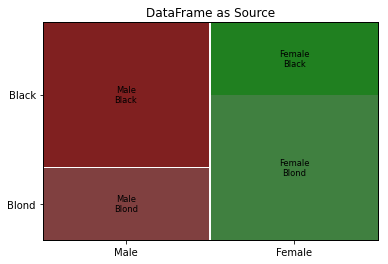

In [6]:
from statsmodels.graphics.mosaicplot import mosaic

Sex = ['Male', 'Male', 'Male', 'Female', 'Female', 'Female']
Hair = ['Blond', 'Black', 'Black', 'Blond', 'Black', 'Blond']
df = pd.DataFrame({'Sex': Sex, 'Hair': Hair})
mosaic(df, ['Sex', 'Hair'], title='DataFrame as Source')
plt.show()

## frequency table as source

In [7]:
# install pydataset
# %pip install pydataset

In [8]:
from pydataset import data
df = pd.DataFrame(data('HairEyeColor'))

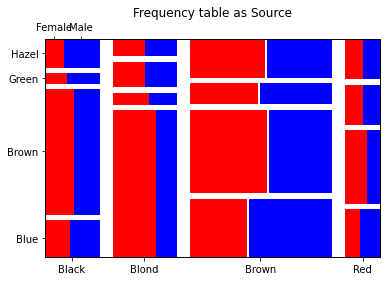

In [9]:
props = lambda key: {'color': 'red' if 'Female' in key else 'blue'} # Choosing colors
mosaic(df.groupby(['Hair', 'Eye', 'Sex']).sum()["Freq"],
       properties = props, 
       axes_label = True,
       labelizer = lambda k: '', # empty labels
       gap = 0.05,
       title='Frequency table as Source')
plt.box(False) # removing chart frame
plt.show()

# Read html text
## Universal declaration of human rights

In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.un.org/en/about-us/universal-declaration-of-human-rights"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# removing script and style elements
for script in soup(["script", "style"]):
    script.extract() 

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

#print(text)


# Wordcloud

In [11]:
# %pip install wordcloud

In [12]:
from wordcloud import WordCloud, STOPWORDS 

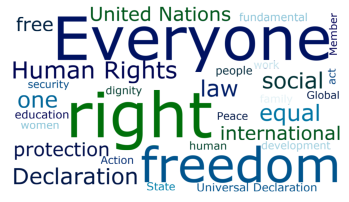

In [13]:
# adding stopwords
stopwords = set(STOPWORDS) 
newstopwords = ['whereas', 'article', 'un', 'udhr', 'full', 'entitled']
stopwords = stopwords.union(newstopwords)

def plot_wordcloud(text):
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          width=1600, height=900,
                          relative_scaling = 0.1,
                          max_words = 30,
                          colormap = 'ocean',
                          background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                          stopwords = stopwords).generate(text)
    
    #plt.figure(1, figsize=(8, 4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
plot_wordcloud(text)

# Polar Plot

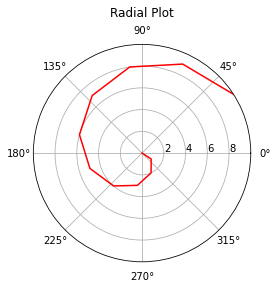

In [14]:
r = np.arange(0, 11)
theta = np.arange(0, 2*np.pi, 2*np.pi/11)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(-theta, r, color = 'red')
ax.set_rmax(10)
ax.set_rticks([2, 4, 6, 8])  # Radial ticks
ax.set_rlabel_position(0) # radial labels position
ax.grid(True)

ax.set_title("Radial Plot", va='bottom')
plt.show()

# Radial Plot

In [17]:
# %pip install -U kaleido

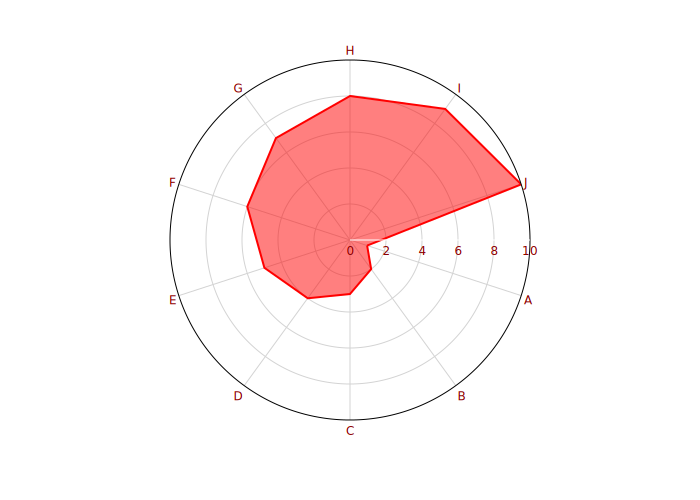

In [19]:
import plotly.io as pio
pio.renderers.default = "svg"

df = pd.DataFrame(dict(
    r=np.arange(1,11),
    theta = list(map(chr, range(65, 75))) # create a sequence list of letters A(65) to J(75)
    ))

fig = px.line_polar(df, r='r', theta='theta', 
                     direction='clockwise',
                    start_angle=-18,
                    line_close=True)

fig.update_traces(fill='toself', 
                  #fillcolor="red", 
                  line_color="red")

# https://plotly.com/python/reference/layout/polar/
fig.update_polars(bgcolor="rgba(0, 0, 0, 0)",
                  angularaxis_color='darkred', 
                  angularaxis_gridcolor="lightgray",
                  angularaxis_linecolor="black",
                  radialaxis_gridcolor="lightgray",
                  radialaxis_color="darkred")
fig.show("svg")